In [4]:
import numpy as np
import socket
from PIL import Image, ImageChops
import struct
import math
import time
import random
import matplotlib.pyplot as plt
import matplotlib
from collections import namedtuple
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [5]:
class DQN(nn.Module):

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
model = DQN(128, 128, 3).to(device)
model.load_state_dict(torch.load('./dict_e1000.kek', map_location=torch.device('cpu')))
print(torch.load('./dict_e1000.kek', map_location=torch.device('cpu')))

OrderedDict([('conv1.weight', tensor([[[[-7.2110e-01,  6.4291e-01, -1.9931e+00,  3.8793e-01, -1.4090e+00],
          [ 5.4997e-02,  1.2800e+00, -1.7592e-01, -2.0778e+00,  4.1686e-02],
          [ 1.1201e+00,  2.6612e+00, -7.7791e-01,  1.7778e+00,  2.3829e-01],
          [ 1.4181e+00, -2.2101e+00,  4.0617e+00,  2.2278e+00, -8.0198e-01],
          [ 2.5913e-01, -5.4458e-02,  2.1716e+00, -6.9173e-01, -2.9060e+00]],

         [[-1.1640e+00, -1.7418e+00, -2.4899e+00, -8.0133e-01, -3.7982e+00],
          [-1.0899e+00, -1.2249e+00, -1.1672e+00, -1.0351e+00,  3.2998e-01],
          [-2.0333e+00,  9.8552e-01, -6.0365e+00,  6.7336e-01, -4.4399e+00],
          [-4.5090e-01, -2.0154e+00,  3.0287e+00, -9.4836e-01,  7.6092e-01],
          [ 2.6489e-01, -1.6165e+00,  7.2424e-01, -7.1256e-01, -1.6284e+00]],

         [[ 2.7548e+00,  2.4823e+00,  2.6008e+00,  5.6122e+00, -4.3715e-01],
          [ 1.5352e+00,  3.4809e+00,  5.5816e-01,  2.6287e+00,  2.5003e+00],
          [-2.7699e-01,  2.8707e+00, -6.95

In [41]:
print(model.conv3.weight.detach().numpy().shape)

(32, 32, 5, 5)


/home/diglitch/.conda/envs/nips/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

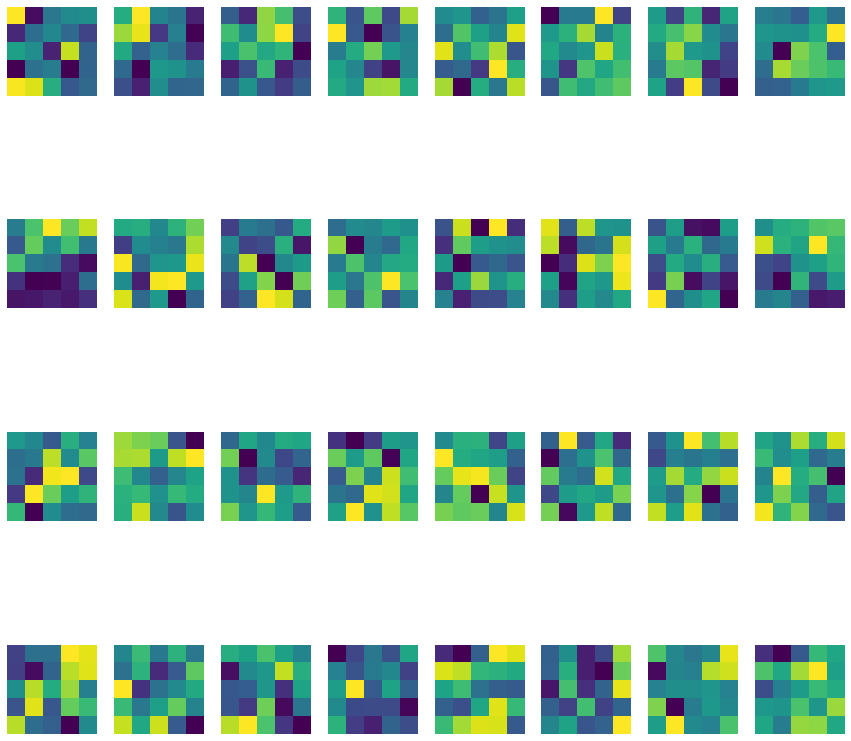

In [42]:
fig = plt.figure()
plt.figure(figsize=(15,15))
for idx, filt  in enumerate(model.conv3.weight.detach().numpy()):
    #print(filt[0, :, :])
    plt.subplot(4,8, idx + 1)
    plt.imshow(filt[0, :, :])#, cmap="gray")
    plt.axis('off')
    
    
fig.show()